<a href="https://colab.research.google.com/github/w4bo/AA2425-unibo-mldm/blob/master/slides/lab-02-housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The [`California Housing`](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/) case study

Our task is to use California census data to forecast housing prices given the population, median income, and median housing price for each block group in California.
Block groups are the smallest geographical unit for which the US Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).
We will just call them "districts" for short.

In [ ]:
import pandas as pd

# df = pd.read_csv("/content/sample_data/california_housing_train.csv", delimiter=",")
df = pd.read_csv("https://raw.githubusercontent.com/w4bo/handsOnDataPipelines/main/materials/datasets/housing.csv", delimiter=",")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


#  ... and now?

# Answer some questions:

- Which attributes (i.e., columns) are contained in the dataset?
- Which is their semantics?

In [ ]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

Dataset description

1. `longitude`: A measure of how far west a house is; a higher value is farther west
2. `latitude`: A measure of how far north a house is; a higher value is farther north
3. `housingMedianAge`: Median age of a house within a block; a lower number is a newer building
4. `totalRooms`: Total number of rooms within a block
5. `totalBedrooms`: Total number of bedrooms within a block
6. `population`: Total number of people residing within a block
7. `households`: Total number of households, a group of people residing within a home unit, for a block
8. `medianIncome`: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. `medianHouseValue`: Median house value for households within a block (measured in US Dollars)
10. `oceanProximity`: Location of the house w.r.t ocean/sea

# Data profiling

In [ ]:
# show some statistics on the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


# Data profiling

In [ ]:
df.describe(include='all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,NaN
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,NaN
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,NaN


# ... are you satisfied with the understanding?

# ... what about data visualization?

Can we exploit the nature of the data?

##

<Axes: xlabel='longitude', ylabel='latitude'>

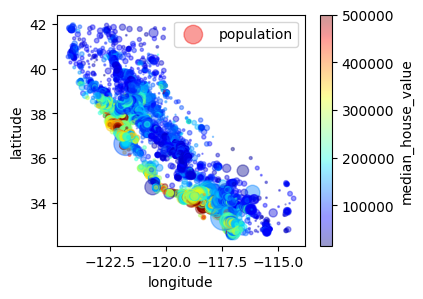

In [ ]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=df["population"]/100, label="population", figsize=(4,3), c="median_house_value", cmap="jet", colorbar=True)

# What if we integrate open data?

# Can we exploit the nature of the data... again?

![California, USA](https://github.com/w4bo/2024-bbs-dm/assets/18005592/06d9fd78-5856-4119-accb-62de0f54b680)


# Merging the data sources

![](https://user-images.githubusercontent.com/18005592/232756567-b706619a-2cc9-4b45-b78f-5172103e0c3b.png)

# Memory usage

What if I change float64 to float32?

In [ ]:
dff = df.copy(deep=True)  # copy the dataframe
for x in df.columns:  # iterate over the columns
    if dff[x].dtype == 'float64':  # if the column has type `float64`
        dff[x] = dff[x].astype('float32')  # ... change it to `float32`
dff.info()  # show some statistics on the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float32
 1   latitude            20640 non-null  float32
 2   housing_median_age  20640 non-null  float32
 3   total_rooms         20640 non-null  float32
 4   total_bedrooms      20433 non-null  float32
 5   population          20640 non-null  float32
 6   households          20640 non-null  float32
 7   median_income       20640 non-null  float32
 8   median_house_value  20640 non-null  float32
 9   ocean_proximity     20640 non-null  object 
dtypes: float32(9), object(1)
memory usage: 887.0+ KB


# Missing values
There are some missing values for `total_bedrooms`. What should we do?

Most Machine Learning algorithms cannot work with missing features.

# Non-numeric attributes

`ocean_proximity` is a text attribute, but not all machine libraries can manipulated textual data types.

In [ ]:
df["ocean_proximity"].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


# Non-numeric attributes

<Axes: >

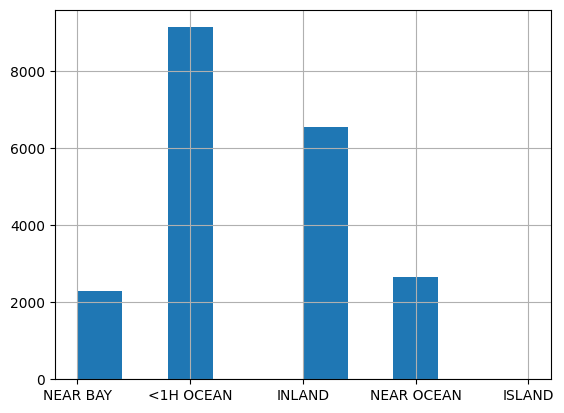

In [ ]:
df["ocean_proximity"].hist()

# Visualization

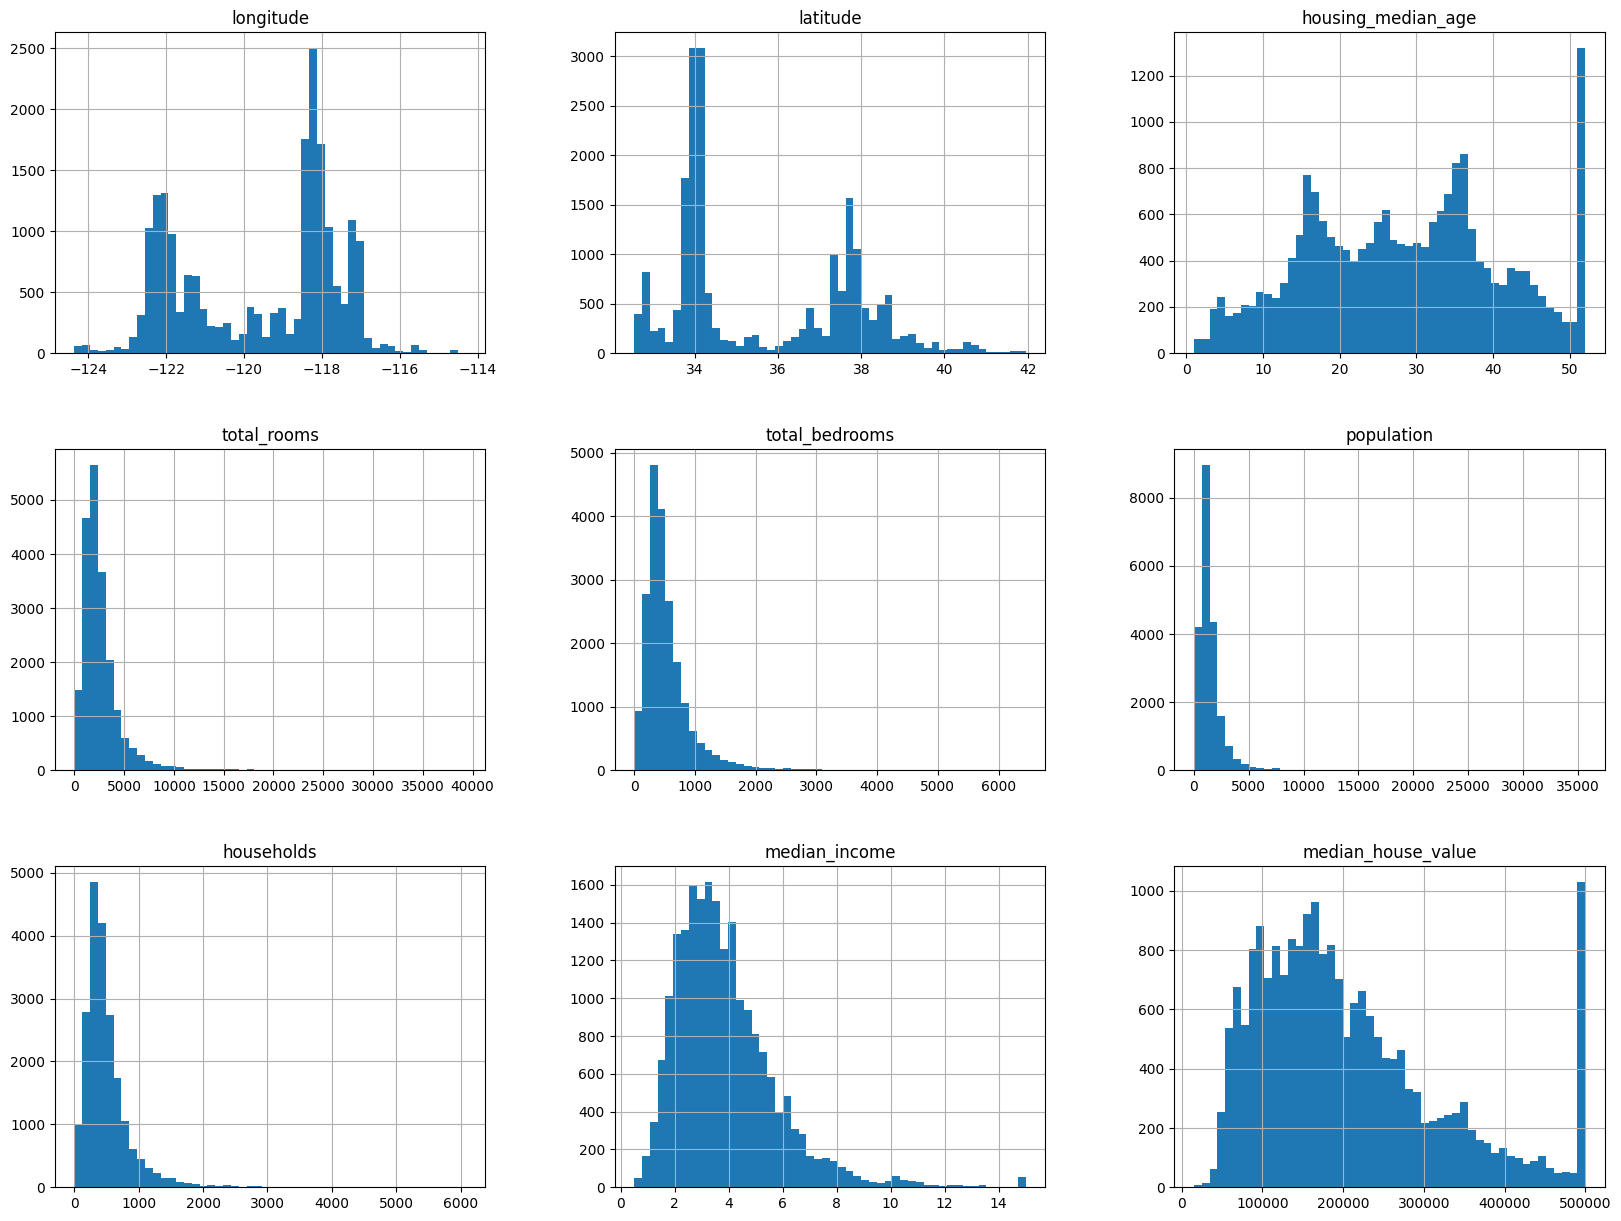

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
df.hist(bins=50, figsize=(20, 15))
plt.show()

# Open questions

- `median_income` should be in dollars. However, it has a strange range. Why? "you are told that the data has been scaled and capped at 15 (actually 15.0001) for higher median incomes, and at 0.5 (actually 0.4999) for lower median incomes. The numbers represent roughly tens of thousands of dollars. The numbers represent roughly tens of thousands of dollars"
- `housing_median_age` and `median_house_value` are capped. As to `median_house_value`, this is a serious problem since it is your target attribute (your labels). Your Machine Learning algorithms may learn that prices never go beyond that limit. You need to check with your client team (the team that will use your system’s output) to see if this is a problem or not. If they tell you that they need precise predictions even beyond 500,000USD, then you have mainly two options: (a) collect proper labels for the districts whose labels were capped, (b) remove those districts from the training set."
- These attributes have very different scales. Should we scale them?
- Many histograms are tail heavy: they extend much farther to the right of the median than to the left. This may make it a bit harder for some Machine Learning algorithms to detect patterns

# Relationships between variables

- Each numeric variable in data will by shared across the y-axes across a single row and the x-axes across a single column
- The diagonal plots are treated differently: univariate distribution plots show the marginal distributions of the data


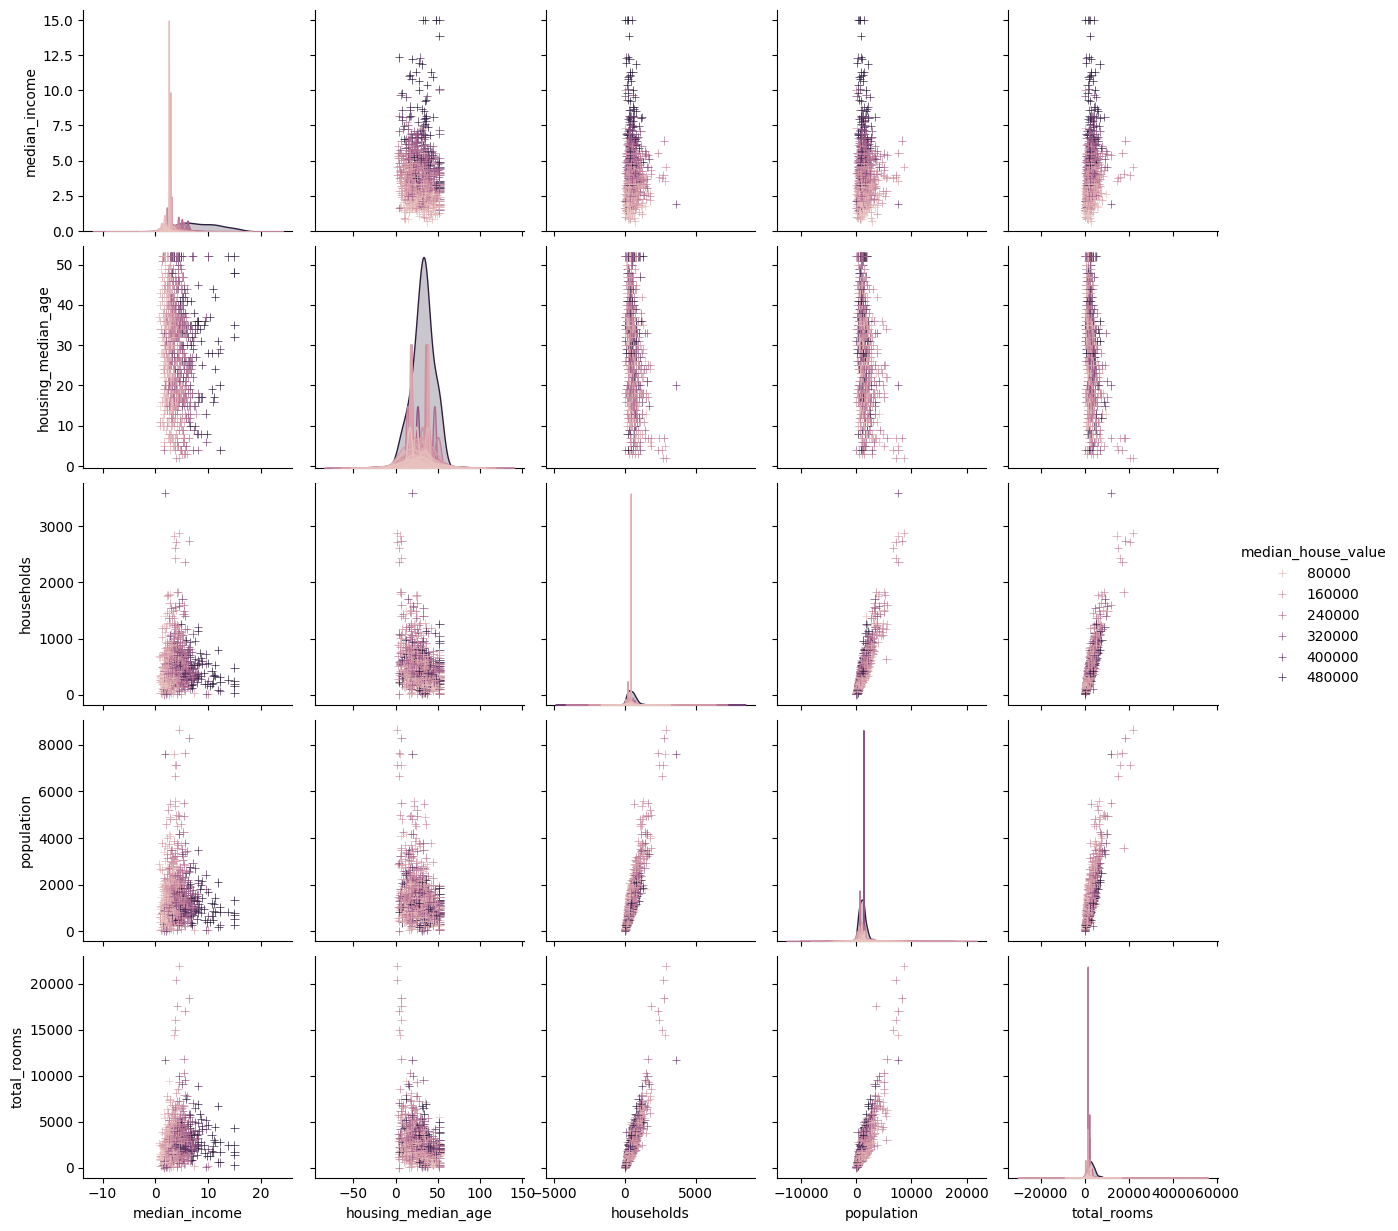

In [ ]:
import seaborn as sns

tmp = df[["median_income", "housing_median_age", "median_house_value", "households", "population", "total_rooms"]]
sns.pairplot(tmp.sample(n=1000, random_state=42), hue='median_house_value', markers='+')
plt.show()

# Pareto frontier

Which blocks represent a good tradeof between cost and number of rooms?


In [ ]:
#| output: false
#| echo: false

!pip install paretoset

<Axes: xlabel='median_house_value', ylabel='total_bedrooms'>

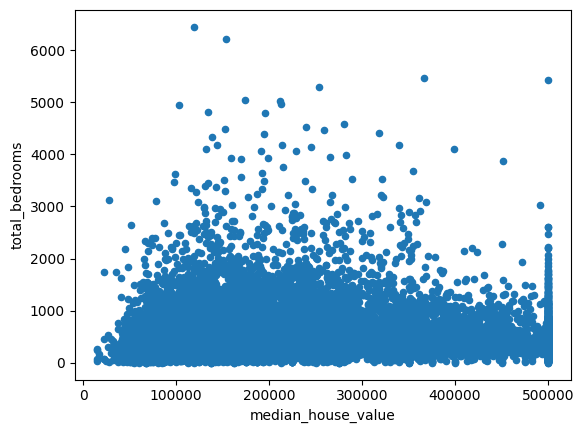

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1)
df.plot.scatter(x='median_house_value', y='total_bedrooms', ax=ax)

# Skyline

The **skyline operator**: optimization problem that computes the Pareto optimum on tuples with multiple dimensions

- *Skyline* comes from the view on Manhattan from the Hudson River. A building is visible if it is not dominated by a building that is taller or closer to the river (two dimensions, distance to the river minimized, height maximized).
- Users want hotels for a holidays to be cheap and close to the beach. However, hotels that are close to the beach are expensive.

Formally, a tuple **dominates** another if it is at least as good in all dimensions and better in at least one dimension.

![NY Skyline](https://img.andrewprokos.com/NYC-SKYLINE-FR-JC-PANORAMA-1100PX-500x170@2x.jpg)

# Pareto frontier

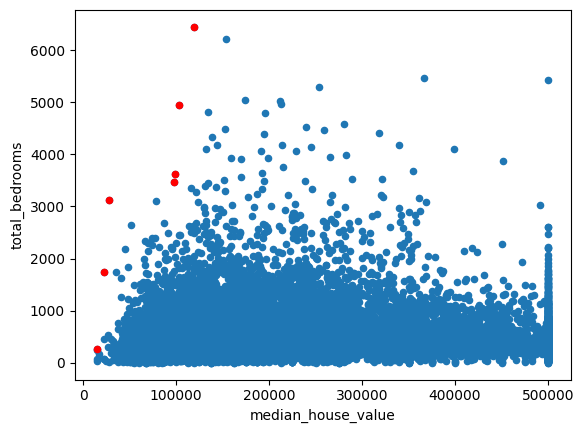

In [ ]:
from paretoset import paretoset

mask = paretoset(df[["median_house_value", "total_bedrooms"]], sense=["min", "max"])
df[mask].plot.scatter(x='median_house_value', y='total_bedrooms', ax=ax, c='red')
fig

<Axes: xlabel='housing_median_age', ylabel='total_bedrooms'>

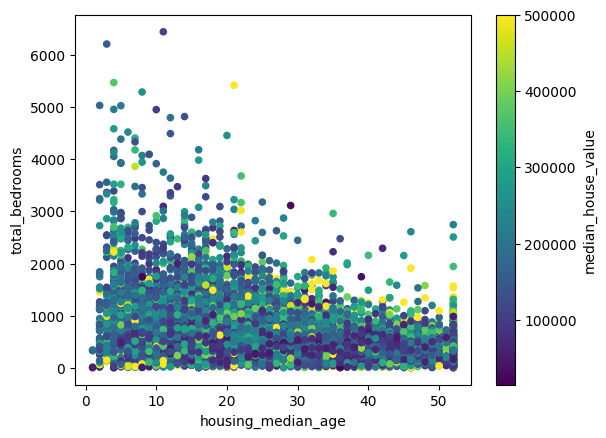

In [ ]:
#| output: false
#| echo: false

# ... in 3D
# Which blocks represent a good tradeof between cost, and number of rooms?

fig, ax = plt.subplots(nrows=1, ncols=1)
df.plot.scatter(x="housing_median_age", y="total_bedrooms", c="median_house_value", ax=ax)

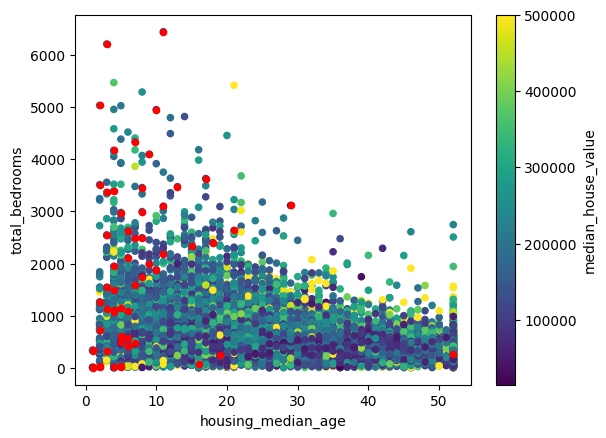

In [ ]:
#| output: false
#| echo: false

mask = paretoset(df[["housing_median_age", "total_bedrooms", "median_house_value"]], sense=["min", "max", "min"])
df[mask].plot.scatter(x="housing_median_age", y="total_bedrooms", ax=ax, c='red')
fig

# Exercise 1

1. For each `ocean_proximity`, return the number of blocks
2. Return the `ocean_proximity` with the highest number of blocks
3. Print the mean value per `ocean_proximity` for every column
4. Print the mean, min and max values value per `ocean_proximity` for every column

In [ ]:
# Write your code here

# Exercise 2

1. Add a new column: `population_per_household = population / households`
1. Add a new column: `rooms_per_household = total_rooms / households`
1. Add a new column: `bedrooms_per_room = total_bedrooms / total_rooms`

In [ ]:
# Write your code here